In [1]:
import pandas
import seaborn
from matplotlib import pyplot
from qbstyles import mpl_style

In [2]:
seaborn.set(style="darkgrid")
pyplot.style.use('seaborn')
mpl_style(dark=False)

In [3]:
data = pandas.read_csv("./data/all.csv")
data = data.set_index("player_season_team", drop=True)
data.sample(3)

,Unnamed: 0,2P%,2PA_per_100poss,2PA_per_36min,2PA_per_game,2PA_totals,2P_per_100poss,2P_per_36min,2P_per_game,2P_totals,...,W,L,W/L%,GB,PW,PL,PS/G,PA/G,CONF,CONF_RANK
player_season_team,,,,,,,,,,,,,,,,,,,,,
RonBrewer_1982_CLE,2390,0.470,22.8,17.0,17.3,812,10.7,8.0,8.1,382,...,15.0,67.0,0.183,40.0,20.0,62.0,103.2,111.7,EASTERN_CONF,11
JulianWright_2009_NOH,13887,0.502,15.1,9.9,3.9,213,7.6,5.0,2.0,107,...,49.0,33.0,0.598,5.0,46.0,36.0,95.8,94.3,WESTERN_CONF,7
RickeyGreen_1983_UTA,2665,0.497,14.9,12.0,11.9,929,7.4,6.0,5.9,462,...,30.0,52.0,0.366,23.0,30.0,52.0,109.0,113.2,WESTERN_CONF,9


In [4]:
print(len(data[data["MVP_WINNER"]==True]))
print(len(data[data["MVP_WINNER"]==False]))

46
19560


In [5]:
print(len(data[data["MVP_CANDIDATE"]==True]))
print(len(data[data["MVP_CANDIDATE"]==False]))

742
18864


<Figure size 1152x432 with 0 Axes>

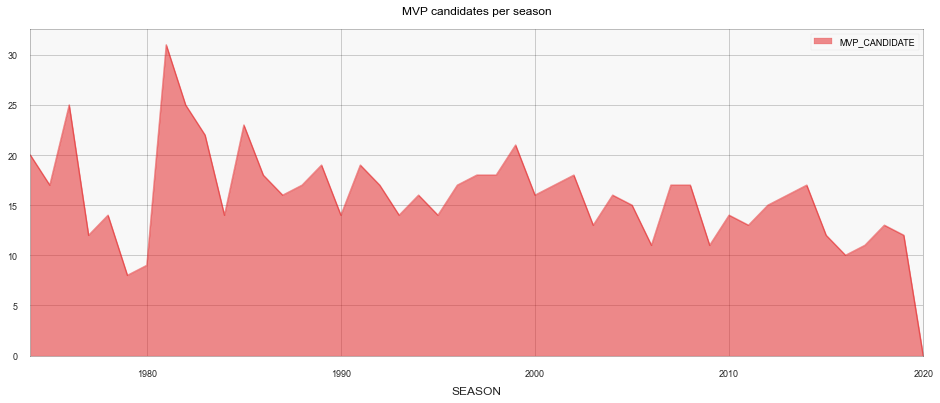

In [6]:
prep = data.groupby(["SEASON"], as_index=False)["MVP_CANDIDATE", "MVP_WINNER"].sum()
pyplot.figure(figsize=(16, 6))
prep.plot(kind='area', x="SEASON", y="MVP_CANDIDATE", figsize=(16, 6), title='MVP candidates per season', alpha=0.5)

In [7]:
data.loc[:, "POS"] = data["POS"].map({"PG":"(1) Point Guard", "SG":"(2) Shooting Guard", "SF":"(3) Strong Forward", "PF":"(4) Power Forward", "C":"(5) Center"})

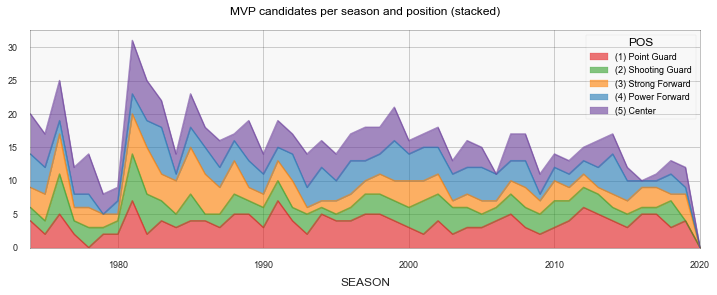

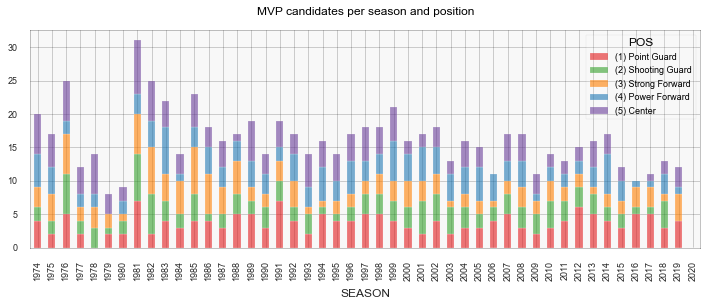

In [8]:
prep = data.groupby(["SEASON", "POS"])["MVP_CANDIDATE", "MVP_PODIUM", "MVP_WINNER"].sum().unstack()
prep.plot(kind='area', y="MVP_CANDIDATE", figsize=(12, 4), title='MVP candidates per season and position (stacked)', alpha=0.6, stacked=True)
pyplot.show()
prep.plot(kind='bar', y="MVP_CANDIDATE", figsize=(12, 4), title='MVP candidates per season and position', alpha=0.6, stacked=True)
pyplot.show()

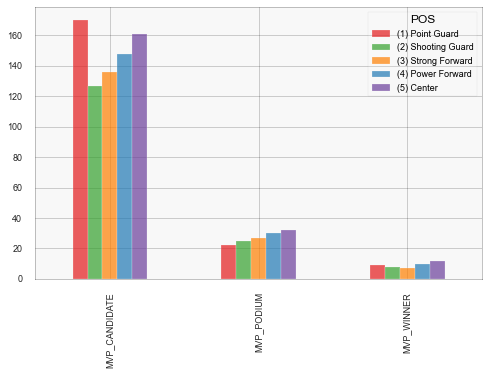

In [9]:
prep = data.groupby(["POS"])["MVP_CANDIDATE", "MVP_PODIUM", "MVP_WINNER"].sum().T
prep.plot(kind="bar", subplots=False, alpha=0.7, figsize=(8,5))
pyplot.show()

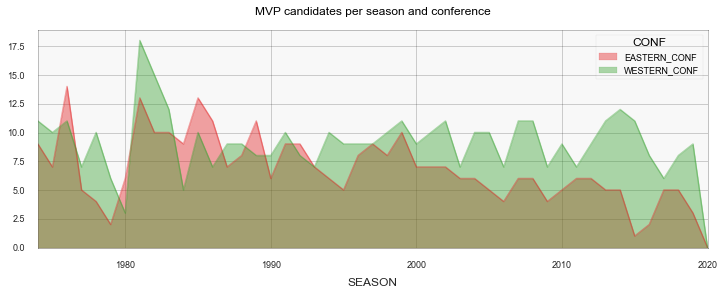

In [10]:
prep = data.groupby(["SEASON", "CONF"])["MVP_CANDIDATE", "MVP_PODIUM", "MVP_WINNER"].sum().unstack()
prep.plot(kind='area', y="MVP_CANDIDATE", figsize=(12, 4), title='MVP candidates per season and conference', alpha=0.4, stacked=False)
pyplot.show()

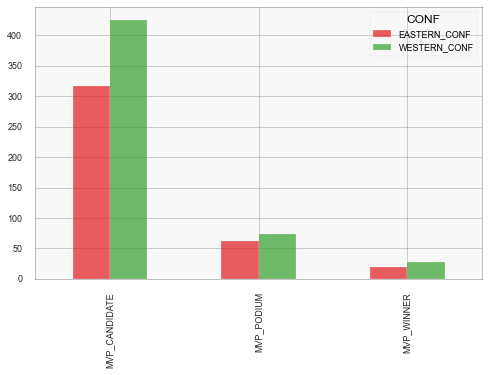

In [11]:
prep = data.groupby(["CONF"])["MVP_CANDIDATE", "MVP_PODIUM", "MVP_WINNER"].sum().T
prep.plot(kind="bar", subplots=False, alpha=0.7, figsize=(8,5))
pyplot.show()

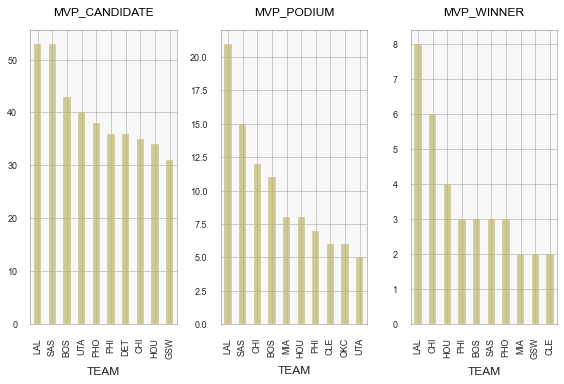

In [12]:
for index, col in enumerate(["MVP_CANDIDATE", "MVP_PODIUM", "MVP_WINNER"]):
    pyplot.subplot(1, 3, index+1)
    prep = data.groupby(["TEAM"])[col].sum().sort_values(ascending=False).head(10)
    prep.plot(kind="bar", alpha=0.7, sort_columns=False, title=col, color="darkkhaki")
pyplot.tight_layout()

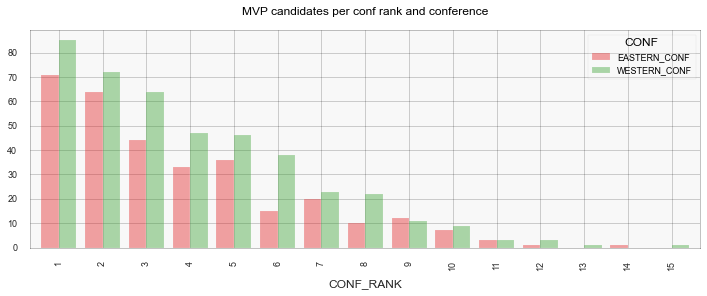

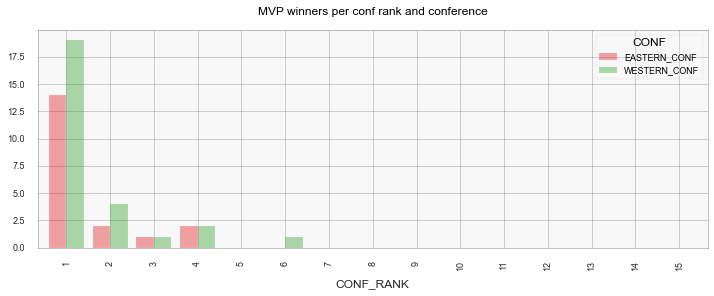

In [53]:
prep = data.groupby(["CONF_RANK", "CONF"])["MVP_CANDIDATE", "MVP_PODIUM", "MVP_WINNER"].sum().unstack()
prep.plot(kind='bar', y="MVP_CANDIDATE", figsize=(12, 4), title='MVP candidates per conf rank and conference', alpha=0.4, stacked=False, width=0.8)
pyplot.show()
prep.plot(kind='bar', y="MVP_WINNER", figsize=(12, 4), title='MVP winners per conf rank and conference', alpha=0.4, stacked=False, width=0.8)
pyplot.show()

In [55]:
data[data["MVP_WINNER"]==True].sort_values(by="CONF_RANK", ascending=False).head(5)

,Unnamed: 0,2P%,2PA_per_100poss,2PA_per_36min,2PA_per_game,2PA_totals,2P_per_100poss,2P_per_36min,2P_per_game,2P_totals,...,W,L,W/L%,GB,PW,PL,PS/G,PA/G,CONF,CONF_RANK
player_season_team,,,,,,,,,,,,,,,,,,,,,
RussellWestbrook_2017_OKC,17855,0.459,23.8,17.4,16.8,1358,10.9,8.0,7.7,624,...,47.0,35.0,0.573,20.0,43.0,39.0,106.6,105.8,WESTERN_CONF,6
MosesMalone_1982_HOU,2569,0.520,26.4,19.2,22.4,1816,13.7,10.0,11.7,945,...,46.0,36.0,0.561,2.0,41.0,41.0,105.9,105.9,WESTERN_CONF,4
KareemAbdulJabbar_1976_LAL,461,0.529,22.7,18.4,21.1,1728,12.0,9.7,11.1,914,...,40.0,42.0,0.488,19.0,41.0,41.0,106.9,106.8,WESTERN_CONF,4
MichaelJordan_1988_CHI,4532,0.546,29.5,21.1,23.7,1945,16.1,11.5,13.0,1062,...,50.0,32.0,0.610,4.0,50.0,32.0,105.0,101.6,EASTERN_CONF,4
MosesMalone_1979_HOU,1471,0.540,18.1,14.1,16.2,1325,9.8,7.6,8.7,716,...,47.0,35.0,0.573,1.0,43.0,39.0,113.4,112.4,EASTERN_CONF,4
